In [1]:
#suur dataset, mdea kui hea kvaliteet, aga sitaks andmeid
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("meruvulikith/190k-spam-ham-email-dataset-for-classification")

100%|██████████| 107M/107M [00:05<00:00, 19.7MB/s] 

Extracting files...


In [ ]:
#linux
!mv {path} .

In [ ]:
#windows
!move {path} .

In [2]:
import numpy as np
import pandas as pd
import ast
import importlib
SpamData= pd.read_csv("1/spam_Emails_data.csv")

In [3]:
SpamData["label"]=SpamData["label"].apply(lambda x: 0 if x=="Ham" else 1)
SpamData["text"]=SpamData["text"].apply(lambda x:x if not isinstance(x, (int, float, complex)) and not isinstance(x, bool) else str(x)) 

In [4]:
SpamDataAnalyse = SpamData.copy()

In [4]:
from PythonFiles import Analyse
importlib.reload(Analyse)
SpamDataAnalyseCopy=SpamDataAnalyse.copy()
SpamWordsDf, WordsDf = Analyse.FindWordCounts(SpamDataAnalyse)


In [ ]:
print(len(SpamDataAnalyse[SpamDataAnalyse["label"]==0]["label"])/len(SpamDataAnalyse["label"]))
print(SpamDataAnalyseCopy.duplicated().sum())
print(len(SpamDataAnalyseCopy[SpamDataAnalyseCopy["label"]==" "]["label"]))
print(len(SpamDataAnalyseCopy[SpamDataAnalyseCopy["label"]==""]["label"]))

In [6]:
threshold_percentage=0.1
tulemus = SpamWordsDf[~SpamWordsDf['word'].isin(WordsDf['word'])]

In [7]:
tulemus

,word,count
23734,,29349
5167,anatrim,6459
14245,ffffffcescapenumber,5466
14247,ffffffbescapenumber,5324
527,wysak,4151
...,...,...
258341,d'r'o,1
258344,finntresa,1
258345,demetrissarita,1
113028,safetybar,1


In [8]:
Words_Merged_df = pd.merge(SpamWordsDf, WordsDf, on='word', how='inner', suffixes=('_spam', '_notspam'))

In [9]:
wordCountSpam=sum(SpamWordsDf["count"])
wordCount=sum(WordsDf["count"])

In [10]:
print(wordCountSpam)
print(wordCount)

19363214
34212201


In [11]:
Multiplier= wordCount/wordCountSpam

In [12]:
tulemusSpam=Words_Merged_df[Words_Merged_df["count_spam"] > Words_Merged_df["count_notspam"]*10*Multiplier]
tulemusSpam.sort_values(by='count_notspam', ascending=False, inplace=True)

C:\Users\kasutaja\AppData\Local\Temp\ipykernel_16268\2797132555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tulemusSpam.sort_values(by='count_notspam', ascending=False, inplace=True)


In [13]:
tulemusSpam

,word,count_spam,count_notspam
13,cescapenumber,112556,2323
22,aescapenumber,79015,1886
40,eescapenumber,43856,1555
45,descapenumber,40973,1000
14,bescapenumber,109539,992
...,...,...,...
15618,cription,40,1
15652,odo,40,1
15659,glucosamine,40,1
15664,iving,40,1


In [14]:
TulemusNotSpam=Words_Merged_df[Words_Merged_df["count_spam"]*10*Multiplier < Words_Merged_df["count_notspam"]]
TulemusNotSpam.sort_values(by='count_spam', ascending=False, inplace=True)

C:\Users\kasutaja\AppData\Local\Temp\ipykernel_16268\3150217540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TulemusNotSpam.sort_values(by='count_spam', ascending=False, inplace=True)


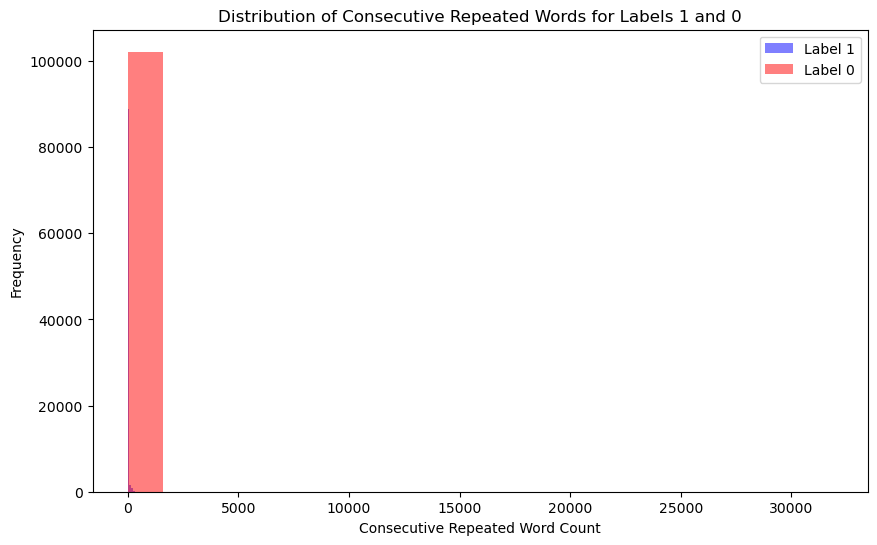

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

# Assuming your DataFrame is called df with columns 'text' and 'label'

# Function to count consecutive repeated words in a sentence
def count_consecutive_repeated_words(text):
    words = text.split()
    repeated_count = 0
    for i in range(1, len(words)):
        if words[i] == words[i-1]:  # Check if the current word is the same as the previous one
            repeated_count += 1
    return repeated_count

# Preprocess and create a new column with the count of consecutive repeated words
SpamDataAnalyse['repeated_word_count'] = SpamDataAnalyse['text'].apply(count_consecutive_repeated_words)

# Split the DataFrame into two: one for label 1 and one for label 0
df_label_1 = SpamDataAnalyse[SpamDataAnalyse['label'] == 1]
df_label_0 = SpamDataAnalyse[SpamDataAnalyse['label'] == 0]

# Plotting the correlation of repeated word counts
plt.figure(figsize=(10, 6))

# Plot for label 1
plt.hist(df_label_1['repeated_word_count'], bins=20, alpha=0.5, label="Label 1", color='blue')

# Plot for label 0
plt.hist(df_label_0['repeated_word_count'], bins=20, alpha=0.5, label="Label 0", color='red')

plt.xlabel('Consecutive Repeated Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Consecutive Repeated Words for Labels 1 and 0')
plt.legend()
plt.show()

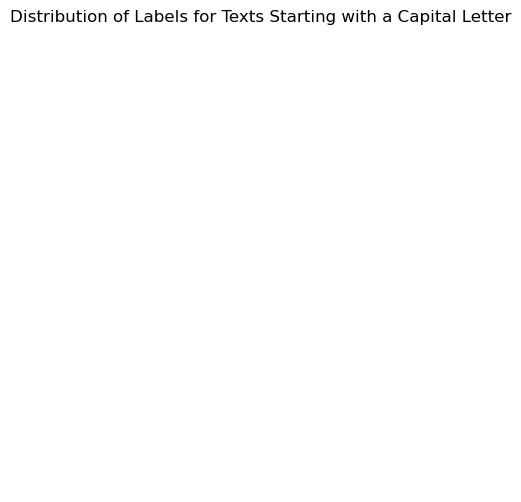

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_capital_start_pie_chart(df):
    """
    This function checks if the message starts with a capital letter,
    and then plots a pie chart showing the distribution of labels (0 and 1)
    for those texts that start with a capital letter.
    """
    # Check if the text starts with a capital letter
    df['starts_with_capital'] = df['text'].apply(lambda x: x[0].isupper() if len(x) > 0 else False)
    
    # Filter out the texts that start with a capital letter
    df_capital = df[df['starts_with_capital']]
    
    # Count the occurrences of label 0 and label 1 for texts starting with a capital letter
    label_counts = df_capital['label'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(label_counts, labels=[f"Label {int(label)}" for label in label_counts.index],
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    plt.title('Distribution of Labels for Texts Starting with a Capital Letter')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_capital_start_pie_chart(SpamDataAnalyse)

In [15]:
TulemusNotSpam

,word,count_spam,count_notspam
930,original,2656,61451
1201,org,2035,47113
1810,october,1264,24676
1824,ect,1248,35621
1929,wednesday,1154,22424
...,...,...,...
69201,maggi,1,6358
69196,5526,1,24
69194,denotes,1,32
69188,delegations,1,47
